In [146]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import requests
from KMeans import KMeans

# Lấy data từ api 

### Data year từ  ngày 1-1-2023 -> 27-10-2023 ( Việt Nam)

In [147]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=16.1667&longitude=107.8333&start_date=2023-01-01&end_date=2023-10-27&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,snowfall,windspeed_10m,winddirection_10m,windgusts_10m&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max&timezone=auto'

In [148]:
r = requests.get(url)

In [149]:
data = r.json()
df = pd.DataFrame(data['hourly'])

# Weather Data Description ( Việt Nam)
- temperature_2m :  nhiệt độ với dộ cao là 2m trên mặt đất 
- relativehumidity_2m : độ ẩm
- dewpoint_2m : điểm sương
- precipitation : mưa + tuyết 
- dewpoint_2m : sương mù 
- windspeed_10m : tốc độ gió 
- winddirection_10m : hướng gió 
- windgusts_10m : độ giật

In [150]:
df.isna().sum()

time                    0
temperature_2m         89
relativehumidity_2m    89
dewpoint_2m            89
precipitation          89
snowfall               89
windspeed_10m          89
winddirection_10m      89
windgusts_10m          89
dtype: int64

Kiểm tra các hàng hàng bị null

In [151]:
df[df.isna().any(axis=1)]

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,snowfall,windspeed_10m,winddirection_10m,windgusts_10m
7111,2023-10-24T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7112,2023-10-24T08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7113,2023-10-24T09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7114,2023-10-24T10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7115,2023-10-24T11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7195,2023-10-27T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7196,2023-10-27T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7197,2023-10-27T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7198,2023-10-27T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# xoá dữ liệu rác 
df.dropna(inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7111 entries, 0 to 7110
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 7111 non-null   object 
 1   temperature_2m       7111 non-null   float64
 2   relativehumidity_2m  7111 non-null   float64
 3   dewpoint_2m          7111 non-null   float64
 4   precipitation        7111 non-null   float64
 5   snowfall             7111 non-null   float64
 6   windspeed_10m        7111 non-null   float64
 7   winddirection_10m    7111 non-null   float64
 8   windgusts_10m        7111 non-null   float64
dtypes: float64(8), object(1)
memory usage: 555.5+ KB


Đếm số hàng và cột 

In [154]:
df.shape

(7111, 9)

## Statistics

In [155]:
df['time'] = pd.to_datetime(df['time']).dt.date


In [156]:
df

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,snowfall,windspeed_10m,winddirection_10m,windgusts_10m
0,2023-01-01,13.9,90.0,12.3,0.1,0.0,4.7,360.0,16.6
1,2023-01-01,13.9,90.0,12.2,0.1,0.0,5.1,356.0,16.9
2,2023-01-01,13.8,89.0,12.1,0.0,0.0,4.8,347.0,17.6
3,2023-01-01,13.7,89.0,11.9,0.0,0.0,4.7,351.0,17.3
4,2023-01-01,13.7,88.0,11.8,0.0,0.0,4.7,351.0,16.9
...,...,...,...,...,...,...,...,...,...
7106,2023-10-24,19.3,97.0,18.8,0.8,0.0,3.1,249.0,9.0
7107,2023-10-24,19.4,97.0,18.9,0.1,0.0,2.3,288.0,9.0
7108,2023-10-24,19.4,96.0,18.8,0.2,0.0,2.1,301.0,11.9
7109,2023-10-24,19.2,98.0,18.9,0.2,0.0,2.5,278.0,11.2


In [157]:
daily_summary = df.groupby('time').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m' : 'mean',
    'precipitation': 'sum',
    'windspeed_10m' : ['max','mean'],
    'winddirection_10m' : ['max','mean'],
    'windgusts_10m' :['max','mean'],
}).reset_index()

In [158]:
new_name =  ['time', 'avg_temperature', 'avg_relativehumidity', 'sum_precipitation', 'max_windspeed','avg_windspeed','max_winddirection', 'avg_winddirection','max_windgusts' , 'avg_windgusts' ]

In [159]:
daily_summary.columns = new_name

In [160]:
daily_summary

,time,avg_temperature,avg_relativehumidity,sum_precipitation,max_windspeed,avg_windspeed,max_winddirection,avg_winddirection,max_windgusts,avg_windgusts
0,2023-01-01,14.137500,89.833333,1.8,9.7,6.066667,360.0,346.875000,27.7,20.704167
1,2023-01-02,14.775000,94.750000,3.8,11.2,7.016667,358.0,337.291667,31.7,22.737500
2,2023-01-03,14.975000,96.958333,8.4,10.8,7.637500,360.0,302.291667,29.9,24.795833
3,2023-01-04,15.391667,95.125000,8.8,8.0,5.587500,351.0,117.333333,24.5,19.612500
4,2023-01-05,16.050000,92.416667,14.0,14.6,8.033333,63.0,41.291667,37.8,26.683333
...,...,...,...,...,...,...,...,...,...,...
292,2023-10-20,21.312500,84.458333,3.5,13.2,6.420833,360.0,155.375000,34.6,19.741667
293,2023-10-21,19.779167,88.625000,5.0,15.6,9.237500,358.0,344.916667,43.6,28.770833
294,2023-10-22,20.275000,87.958333,2.7,11.2,6.350000,360.0,288.750000,29.9,19.466667
295,2023-10-23,19.662500,95.791667,26.9,8.8,5.525000,360.0,232.541667,29.5,20.004167


In [161]:
select_df = daily_summary.iloc[:,1:]
select_df

,avg_temperature,avg_relativehumidity,sum_precipitation,max_windspeed,avg_windspeed,max_winddirection,avg_winddirection,max_windgusts,avg_windgusts
0,14.137500,89.833333,1.8,9.7,6.066667,360.0,346.875000,27.7,20.704167
1,14.775000,94.750000,3.8,11.2,7.016667,358.0,337.291667,31.7,22.737500
2,14.975000,96.958333,8.4,10.8,7.637500,360.0,302.291667,29.9,24.795833
3,15.391667,95.125000,8.8,8.0,5.587500,351.0,117.333333,24.5,19.612500
4,16.050000,92.416667,14.0,14.6,8.033333,63.0,41.291667,37.8,26.683333
...,...,...,...,...,...,...,...,...,...
292,21.312500,84.458333,3.5,13.2,6.420833,360.0,155.375000,34.6,19.741667
293,19.779167,88.625000,5.0,15.6,9.237500,358.0,344.916667,43.6,28.770833
294,20.275000,87.958333,2.7,11.2,6.350000,360.0,288.750000,29.9,19.466667
295,19.662500,95.791667,26.9,8.8,5.525000,360.0,232.541667,29.5,20.004167


## Scale data 

In [162]:
X = StandardScaler().fit_transform(select_df)

## Train

Chọn ra 12 tâm ngẫu nhiên 

In [163]:
cluster_centers_  = X[np.random.permutation(X.shape[0])[:12]]

In [164]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
centers = model.cluster_centers_

Công thức tính khoảng cách của nhiều  <br />
 - p,q	=	2 Điểm
- $q_i, p_i$ = các vectors 
- n	=	số phân tử

công thức <br />
$$d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2}$$

In [165]:
kmeans._distance(np.array([4,4]), np.array([5, 1]))

3.1622776601683795

Tìm các vị trí nhỏ nhất   <br />
$$\mathbf{y}_i = \arg\min_{\mathbf{y}_i} \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2 ~~~ (3)$$

In [166]:
labels = [kmeans._nearest(cluster_centers_, x) for x in X]

Tính trung bình cộng của các điểm <br /> 
 **Với công thức sẽ là**
$$\mathbf{m}_j = \frac{ \sum_{i=1}^N y_{ij} \mathbf{x}_i}{\sum_{i=1}^N y_{ij}}$$ 
$m_j$ là trung bình cộng của các điểm trong cluster $j$


In [167]:
indices = [[i for i, l in enumerate(labels) if l == j]
                        for j in range(12)]

In [168]:
X_by_cluster = [X[i] for i in indices]
[c.sum(axis=0) / len(c) for c in X_by_cluster]

[array([ 0.88022632, -0.93989536, -0.31208925, -0.81741228, -0.66665422,
         0.15562914,  0.29293018, -1.00074117, -0.54966724]),
 array([ 1.5056966 , -2.48595834, -0.56628692,  0.17813639,  0.54621282,
         0.07660061,  0.64730869,  0.26027454,  0.41521288]),
 array([ 0.11846946,  0.43296299, -0.10043857, -0.53532294, -0.77020685,
         0.85826543, -0.6226938 , -0.59060772, -0.86943147]),
 array([-0.31328259,  0.07120072, -0.45920382, -0.12524897, -0.27771557,
        -1.03740172, -0.92893899, -0.34631016, -0.53543651]),
 array([-1.21275969,  1.62166393,  0.73292979,  1.03627435,  1.43705857,
         1.00364881,  1.50979862,  1.1685947 ,  1.36924705]),
 array([ 0.81888555, -1.14202766, -0.41919341,  1.8443322 ,  1.757565  ,
        -0.32635023,  0.75266165,  1.86345962,  1.89147248]),
 array([ 0.36099643, -0.15755226, -0.16428074, -0.687413  , -0.64632609,
        -0.77481695, -0.41659802, -0.71267609, -0.67239523]),
 array([ 0.03271889,  0.69568067,  0.33944367, -0.88248

In [169]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')
	Z = [np.append(A, index) for index, A in enumerate(centers)]
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [170]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [171]:
features = list(daily_summary.columns[1:])

In [172]:
P = pd_centers(features, centers)

In [173]:
P

,avg_temperature,avg_relativehumidity,sum_precipitation,max_windspeed,avg_windspeed,max_winddirection,avg_winddirection,max_windgusts,avg_windgusts,prediction
0,1.368422,-2.226971,-0.535726,-0.050607,0.236475,0.220257,0.632618,-0.040964,0.135744,0
1,0.172904,0.358130,-0.196059,-0.559301,-0.727203,0.265219,-0.533512,-0.521405,-0.784759,1
2,-1.106355,0.271152,-0.537098,-0.071113,-0.099350,-1.444751,-1.227568,-0.318666,-0.395726,2
3,-2.287399,1.213662,1.511576,1.837556,2.018661,0.979814,-1.204656,1.930536,1.751738,3
4,0.755613,-0.602205,-0.267074,-0.806702,-0.623738,0.439857,0.377686,-0.889391,-0.518624,4
5,0.559266,-0.479734,-0.231226,0.322659,0.257894,0.114569,0.667486,0.380511,0.376034,5
6,-1.024814,1.349227,0.303563,0.105875,0.307817,0.927674,1.590627,0.241169,0.348992,6
7,0.817849,-1.058379,-0.571888,1.729691,1.459099,-0.215750,0.840195,1.625039,1.480154,7
8,0.773838,-1.399934,-0.307926,2.277630,2.727618,-0.433384,0.722224,2.738358,3.156885,8
9,0.070182,0.957177,1.834663,-0.872064,-0.885028,0.826536,0.457152,-0.604376,-0.643550,9


# Dry day 

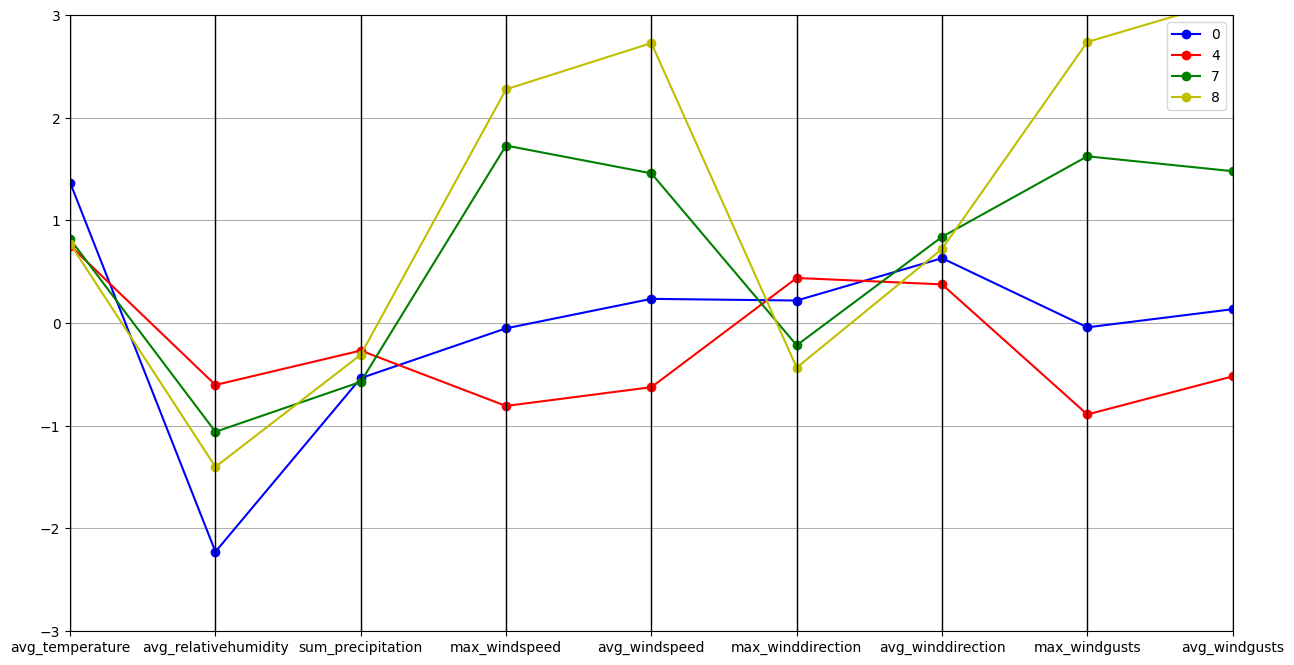

In [174]:
parallel_plot(P[P['avg_relativehumidity'] < -0.5])

# Warm Days

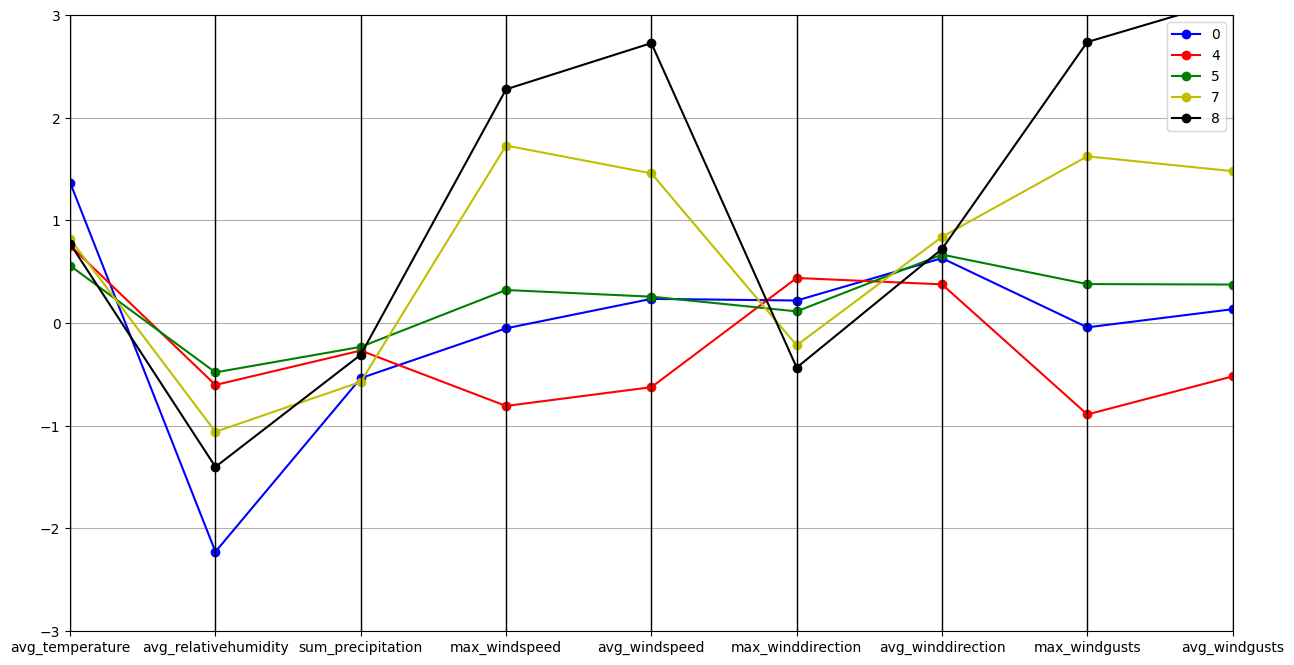

In [175]:
parallel_plot(P[ (P['avg_temperature'] > 0.5) &  (P['avg_relativehumidity'] < 0.5) ])

# Cool days 

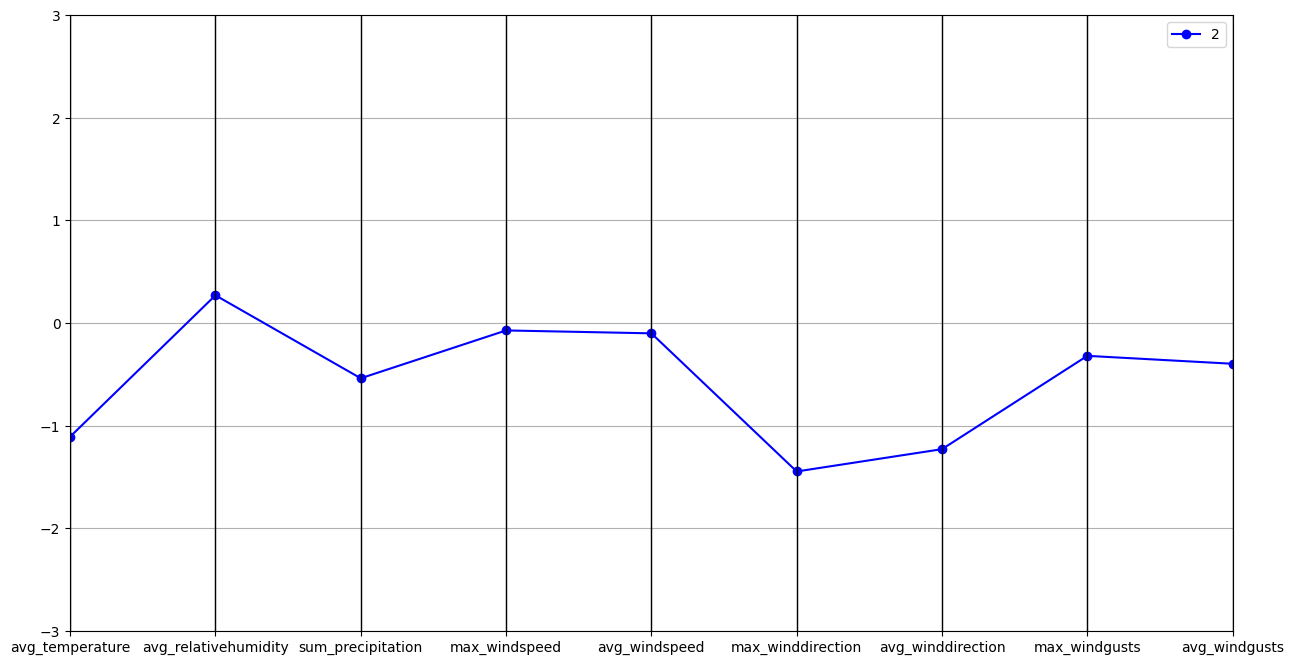

In [176]:
parallel_plot(P[ (P['avg_temperature'] < -0.5) &  (P['avg_relativehumidity'] < 0.5) ])